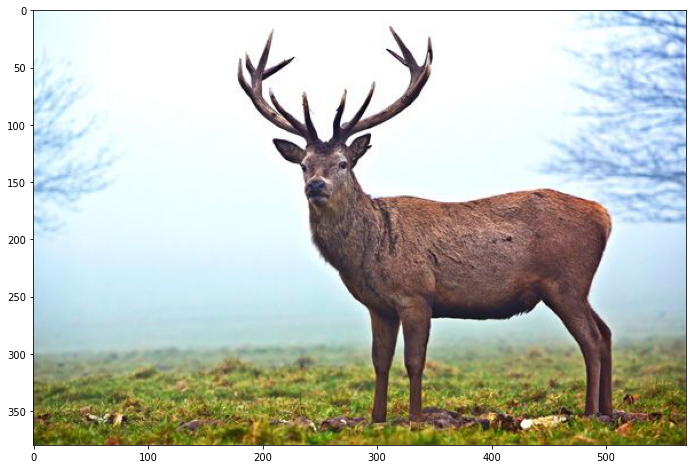

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = plt.imread('deer.jpg')/255.
plt.figure(figsize = (15,8))
plt.imshow(image)

Background subtraction is a vital and highly useful step in many computer vision applications. Few of the popular uses are:

1. Remove moving objects from stationary background in a video

2. Removing green screen background for adding different background effects.

In this miniproject, we approach background subtraction by the method of colour-clusters separation. At first, we assume that we have a high contrast image which distinctly separates background with the foreground. Second, we assume that intensity levels of each colour fit a Gaussian distribution. Using these assumptions, we can model a Gaussian mixture on the image to cluster the colours and then separate them.

Steps considered:


Often, the best way to find an appropriate cluster number is to try different cluster numbers and see which fits your data appropriately. The two most popular evaluation metrics for picking cluster numbers for fitting Gaussian Mixture models are BIC and AIC. BIC stands for Bayesian information criterion and AIC stands for Akaike information criterion. The intuition in the calculation of both of these metrics is that they favor the simplest model that maximize the likelihood function of the model.Calculating the AIC and BIC is easy because they are built in as a method on the Scikit-Learn Gaussian Mixture class. By setting up a loop to try different cluster numbers and calculate the AIC and BIC, you can then plot the metrics together to pick your cluster number.
1. We separate three channels of the 3D image (RGB) to get 2D images 
2. We fit GMM on each separate channels considering only two clusters in our image
3. We calculate the average value of gaussian means of both clusters for all channels separately, this is the threshold
4. We create a mask for foreground image by filtering out only those pixels which have a value above or below the threshold
5. We then apply this mask on the image by multiplying pixel-to-pixel for all the channels separately
Finally, we concatenate all the channels to get our final 3D image with background removed/subtracted.

In [96]:
import imageio

In [97]:
img = imageio.imread('deer.jpg', format='jpg')


In [98]:
img_np = np.asarray(img)

In [99]:
img.shape

(380, 570, 3)

In [100]:
r = img[:,:,0]
g = img[:,:,1]
b = img[:,:,2]


In [102]:
from sklearn.mixture import GaussianMixture

In [107]:
#Setting number of components 2 as we have 2 cluster, one for foreground and one for background
gmm_r = GaussianMixture(n_components=2, random_state=123, n_init=10).fit(r)
gmm_g = GaussianMixture(n_components=2, random_state=123, n_init=10).fit(g)
gmm_b = GaussianMixture(n_components=2, random_state=123, n_init=10).fit(b)

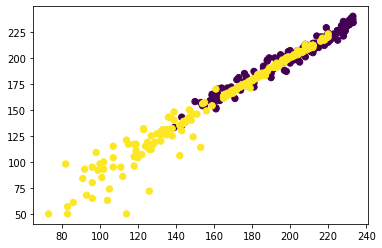

In [108]:
labels = gmm_r.predict(r)
plt.scatter(r[:, 0], r[:, 1], c=labels, s=40, cmap='viridis');

In [109]:
threshold_r = np.mean(gmm_r.means_)
threshold_g = np.mean(gmm_g.means_)
threshold_b = np.mean(gmm_b.means_)

In [110]:
r

Array([[225, 225, 225, ..., 180, 188, 196],
       [225, 225, 225, ..., 175, 189, 197],
       [225, 225, 225, ..., 169, 189, 200],
       ...,
       [ 83,  57,  50, ...,  52,  67,  94],
       [ 83,  50,  44, ...,  53,  67,  96],
       [104,  63,  56, ...,  60,  70, 100]], dtype=uint8)

In [111]:
threshold_r

189.73954401550247

In [112]:
def masking(r, threshold_r):
  R_mask = []
  for point in r:
    li = []
    for i in point:
      li.append(0) if i < threshold_r else li.append(1)
    R_mask.append(li)
  return np.array(R_mask)

In [113]:
R = masking(r,threshold_r).astype(np.float)
G = masking(g,threshold_g).astype(np.float)
B = masking(b,threshold_b).astype(np.float)

In [114]:
img_r =  R*r
img_g = G*g
img_b = B*b

In [115]:
len(img_b[1])

570

In [116]:
# At first reshape all three 2-dim image to 3-dim image
img_r = img_r.reshape(img_r.shape[0], img_r.shape[1], 1)
img_g = img_g.reshape(img_g.shape[0], img_g.shape[1], 1)
img_b = img_b.reshape(img_b.shape[0], img_b.shape[1], 1)

# Fill the numpy function to use here for concatenating all three channels
img =  np.concatenate([img_r,img_g,img_b], axis=2)

In [117]:
img.shape

(380, 570, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(380, 570, 3)


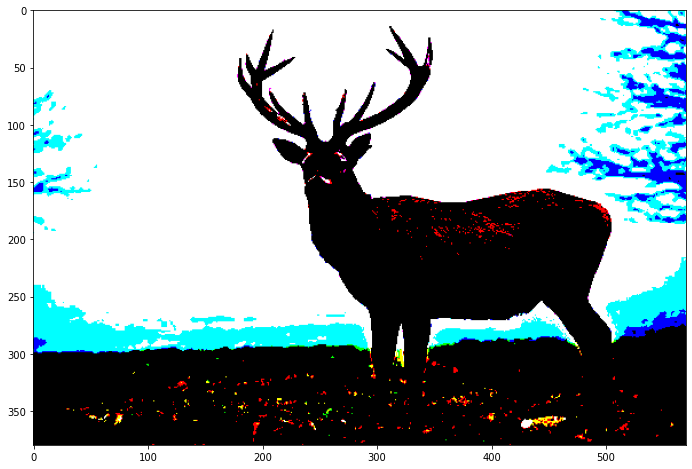

In [118]:
plt.figure(figsize = (15,8))
print(img.shape)
plt.imshow(img)